In [1]:
!pip install transformers datasets sacrebleu rouge_score torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.1 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=4b5f8694e06936956f8d69e39c65014900833fcbf053b4c5269adc6116d5ebdf
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from datasets import load_dataset, concatenate_datasets
from transformers import MT5ForConditionalGeneration, MT5Tokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [4]:
xlsum_languages = {
    "en": "english",
    "hi": "hindi",
    "pa": "punjabi",
    "ur": "urdu",
    "bn": "bengali",
    "ta": "tamil",
    "te": "telugu",
    "mr": "marathi"
}

In [6]:
all_datasets = []

for lang_code, xlsum_name in xlsum_languages.items():
    print(f"\n=== {lang_code.upper()} / {xlsum_name} ===")
    
    dataset = load_dataset("csebuetnlp/xlsum", xlsum_name, split="train[:1%]")  
    print("Article:", dataset[0]['text'])
    print("Summary:", dataset[0]['summary'])

    dataset = dataset.map(lambda x: {
        "input_text": f"summarize: {x['text']}",
        "target_text": x["summary"]
    })
    
    all_datasets.append(dataset)


=== EN / english ===
Article: The Met Office has issued a yellow weather warning for wind covering Wales and England, starting from 21:00 GMT on Wednesday evening. Travel and power are both likely to be disrupted, with the warning to remain in place until 15:00 on Thursday. Gusts of 55mph (88kmh) are likely and could hit up to 70mph on coasts and hills, with heavy and blustery showers.
Summary: Winds could reach gale force in Wales with stormy weather set to hit the whole of the country this week.


Map:   0%|          | 0/3065 [00:00<?, ? examples/s]


=== HI / hindi ===


0000.parquet:   0%|          | 0.00/187M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/19.6M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/70778 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8847 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8847 [00:00<?, ? examples/s]

Article: नेपाल में इस दौरे की भरपूर तैयारियां चल रही हैं. इसकी ख़ास वजह भी है क्योंकि 23 साल बाद कोई चीनी राष्ट्रपति नेपाल पहुंच रहा है. नेपाल के प्रधानमंत्री केपी शर्मा ओली के विदेश मामलों के सलाहकार डॉ. राजन भट्टाराई ने इस दौरे को ऐतिहासिक बताया है. उन्होंने बताया कि चीन के राष्ट्रपति के साथ उनका एक प्रतिनिधि दल भी होगा. दोनों देशों के बीच कई समझौते होने की बात भी कही जा रही है. चीन के राष्ट्रपति और नेपाल के प्रधानमंत्री के बीच आधिकारिक बैठक भी तय हुई है. समाप्त नेपाल जाने से पहले चीन के राष्ट्रपति भारत में प्रधानमंत्री नरेंद्र मोदी के साथ अनौपचारिक मुलाक़ात करेंगे. इससे पहले शी जिनपिंग पाकिस्तान के प्रधानमंत्री इमरान ख़ान के साथ भी बैठक कर चुके हैं. चीन का प्रभाव दक्षिण एशिया में लगातार बढ़ रहा है. वो चाहे नेपाल, श्रीलंका, पाकिस्तान या बांग्लादेश हो. हर जगह चीन की मौजूदगी बढ़ी है. ये सभी देश चीन की वन बेल्ट वन रोड परियोजना में शामिल हो गए हैं. दूसरी तरफ़ भारत इस परियोजना के पक्ष में नहीं है. नेपाल की राष्ट्रपति विद्या देवी भंडारी और चीन के राष्ट्रपति शी जिनपिंग नेपाल की तरफ़ बढ़ता च

Map:   0%|          | 0/708 [00:00<?, ? examples/s]


=== PA / punjabi ===


0000.parquet:   0%|          | 0.00/35.1M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/2.93M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/2.96M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8215 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1026 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1026 [00:00<?, ? examples/s]

Article: ਕ੍ਰਿਸ ਹੇਰਿੰਗ ਨੇ ਇਹ ਤਸਵੀਰ ਨੌਰਫਾਕ ਵਿਚ ਖਿੱਚੀ ਅਤੇ ਇਸ ਨੂੰ ਨਾਮ ਦਿੱਤਾ 'ਫਾਇਟਿੰਗ ਟੂ ਦਾ ਐਂਡ' ਮਤਲਬ ਆਖ਼ਰ ਤੱਕ ਸੰਘਰਸ਼ ਓਐੱਨ ਹਮਫੇਜ਼ ਨੇ ਡਰਹਮ ਦੇ ਲਾਇਟ ਹਾਊਸ ਦੇ ਨੇੜੇ ਉੱਠਦੀਆਂ ਲਹਿਰਾਂ ਦੇ ਜੋਸ਼ ਨੂੰ ਕੈਦ ਕੀਤਾ। ਓਐੱਨ ਹਮਫੇਜ਼ ਨੇ ਸਮੁੰਦਰ ਕੰਢੇ ਤੋਂ ਕਰੀਬ 48 ਕਿਲੋਮੀਟਰ ਦੂਰ ਇਹ ਤਸਵੀਰ ਖਿੱਚੀ। ਇਸ ਤਸਵੀਰ ਵਿਚ ਸੇਲਰ ਵਾਇਟਫਿਸ਼ ਫੜ੍ਹਨ ਦੀ ਤਿਆਰੀ ਕਰਦੇ ਦੇਖੇ ਜਾ ਸਕਦੇ ਹਨ। ਇਹ ਵੀ ਪੜ੍ਹੋ: ਟੇਰੀ ਪੇਨਜਿਲੇ ਨੇ ਇਸ ਤਸਵੀਰ ਵਿਚ 13 ਸਾਲ ਦੀ ਕੁੜੀ ਲੂਸੀ ਸਿਮਜ਼ ਨੂੰ ਕੈਦ ਕੀਤਾ ਸੀ। ਲੂਸੀ 6 ਕੁੜੀਆਂ ਦੀ ਉਸ ਰਿਲੇਅ ਟੀਮ ਦਾ ਹਿੱਸਾ ਸੀ, ਜਿਨ੍ਹਾਂ ਨੇ ਜੂਨ ਮਹੀਨੇ ਵਿਚ ਇੰਗਲਿਸ਼ ਚੈਨਲ ਪਾਰ ਕੀਤਾ ਸੀ। ਕਰੇਗ ਸਕੌਟ ਦੇ ਕੈਮਰੇ ਵਿਚ ਕੈਦ ਹੋਈ ਇਹ ਤਸਵੀਰ ਪਥਰੀਲੇ ਤਟ ਦਾ ਨਜ਼ਾਰਾ ਪੇਸ਼ ਕਰਦੀ ਹੈ। ਜੌਹਨ ਰੌਬਰਟਸ ਨੇ ਗਰੀਨ ਆਇਲ ਨਾਮ ਦੀ ਇਸ ਆਇਰਿਸ਼ ਬੇੜੀ ਦੀ ਤਸਵੀਰ ਤਰਕਾਲਾਂ ਵੇਲੇ ਖਿੱਚੀ ਸੀ ਇਹ ਤਸਵੀਰ ਡੇਵ ਏਜਲੀ ਨੇ ਲਈ ਹੈ। ਉਨ੍ਹਾਂ ਨੇ ਮੱਛੀਆਂ ਫੜ੍ਹਨ ਵਾਲੀ ਇੱਕ ਬੇੜੀ ਦੇ ਚਾਲਕ ਦਲ ਦੇ ਦੋ ਮੈਂਬਰਾਂ ਨੂੰ ਕੈਮਰੇ ਵਿਚ ਕੈਦ ਕੀਤਾ। ਇਹ ਤਸਵੀਰ ਇਆਨ ਰੀਡ ਦੇ ਕੈਮਰੇ ਰਾਹੀ ਸਾਹਮਣੇ ਆਈ। ਇਹ ਬੇੜੀ 1980 ਵਿਆਂ ਤੋਂ ਸਕਾਲੂਵਾ ਦੇ ਤਟ ਉੱਤੇ ਖੜ੍ਹੀ ਹੈ। ਤੁਹਾਨੂੰ ਇਹ ਵੀਡੀਓ ਵੀ ਪਸੰਦ ਆ ਸਕਦੇ ਹਨ- (ਬੀਬੀਸੀ ਪੰਜਾਬੀ ਨਾਲ FACEBOOK, INSTAGRAM, TWITTERਅਤੇ YouTube 'ਤੇ ਜੁੜੋ।)
Summary: ਬ੍ਰਿਟੇਨ ਵਿਚ ਇਸ ਸਾਲ ਸੇਲਰਜ਼

Map:   0%|          | 0/82 [00:00<?, ? examples/s]


=== UR / urdu ===


0000.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/17.4M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/17.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67665 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8458 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8458 [00:00<?, ? examples/s]

Article: رفاہ میں گزشتہ تین روز کے دوران ہونے والی جھڑپوں میں بارہ فلسطینی اور پانچ اسرائیلی فوجی ہلاک ہوئے ہیں۔ ریڈیو کے مطابق گھروں کی مسماری جنوبی غزہ اور مصر کے درمیان بفر زون کو وسیع کرنے کے منصوبے کا حصہ ہے۔ اسرائیلی ریڈیو کی رپورٹ کے مطابق ’نکل مکانی کرنے والے لوگوں کے لئے گھروں کی فراہمی کی ذمہ داری‘ اسرائیل پر ہو گی۔
Summary: اسرائیلی ریڈیو کے مطابق فوج کو غزہ کی پٹی میں رفاہ میں واقع سینکڑوں گھروں کو مسمار کرنے کے اختیارات دے دیئے گئے ہیں۔


Map:   0%|          | 0/677 [00:00<?, ? examples/s]


=== BN / bengali ===


0000.parquet:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/3.41M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8102 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Article: দুর্গাপুজায় মহিষাসুর বধ্যে মধ্য দিয়ে অশুভর ওপর শুভর বিজয় দেখানো হয়। কিন্তু সেটা বিজয়ীর লেখা ইতিহাস বলেই গবেষকরা এখন বলছেন। তাদের লোককথা অনুযায়ী, আর্যদের দেবী দুর্গা এই সময়েই তাদের রাজা মহিষাসুরকে ছলনার মাধ্যমে হত্যা করেছিলেন। রাজাকে হারানোর শোক হাজার হাজার বছর ধরেও ভুলতে পারেননি আদিবাসী সমাজ। 'অসুর' ভারতের একটি বিশেষ আদিবাসী উপজাতি। পশ্চিমবঙ্গ, ঝাড়খণ্ড আর বিহার - এই তিন রাজ্যের সরকারি তপশিলী উপজাতিদের তালিকার একেবারে প্রথম নামটিই হল অসুর। তবে এখন 'অসুর' ছাড়া অন্য আদিবাসী সমাজও মহিষাসুর স্মরণ অনুষ্ঠানে অংশ নিচ্ছেন। পশ্চিমবঙ্গ, ঝাড়খণ্ড, ছত্তিশগড়ের আদিবাসী অধ্যুষিত এলাকাগুলিতে 'মহান অসুর সম্রাট হুদুড় দুর্গা স্মরণ সভা'র আয়োজন প্রতিবছরই বাড়ছে বলে জানাচ্ছেন আদিবাসী সমাজ-গবেষকরা। "২০১১ সালে গোটা পশ্চিমবঙ্গে ২০০-র কিছু বেশি এরকম স্মরণসভা হয়েছিল, ২০১৮ সালে সংখ্যাটা বেড়ে দাঁড়ায় ৭০০-র কিছু বেশি," বলছিলেন মহিষাসুর তথা ভারতের আদিবাসীদের উৎস সন্ধানে এক নির্মীয়মাণ তথ্যচিত্রের পরিচালক সুমিত চৌধুরী। মহিষাসুরের স্মরণে পূজা। আরও পড়তে পারেন: রামকে নিয়ে রসিকতা: অধ্যাপকের বিরুদ

Map:   0%|          | 0/81 [00:00<?, ? examples/s]


=== TA / tamil ===


0000.parquet:   0%|          | 0.00/61.3M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/7.09M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16222 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2027 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2027 [00:00<?, ? examples/s]

Article: கோப்புப்படம் இந்த மூளை, குறிப்பிடத்தக்க அளவு நல்ல நிலையில் இருந்தது. ஏனென்றால், டைனோசர் இறந்த போது அதன் தலை, சதுப்பு நிலத்தை போல உயர் அமிலத்தன்மை மற்றும் குறைந்த அளவிலான பிராண வாயு அடங்கிய தண்ணீரில் மூழ்கி இருந்ததே காரணம். இந்த மூளை இக்வானோடனை போன்ற மிகப்பெரிய தாவர உணவுகளை உண்ணும் விலங்கினுடையதாக இருக்கலாம் என்றும், இது சுமார் 130 மில்லியன் ஆண்டுகளுக்கும் மேலாக பழமை வாய்ந்ததாக இருக்கலாம் என்றும் விஞ்ஞானிகள் நம்புகின்றனர். சசெக்ஸில் புதைபடிவங்களை தேடுபவர் ஒருவர் இந்த மூளையை கண்டுபிடித்தார். இது தற்கால பறவைகள் மற்றும் முதலைகளின் மூளைகளுடன் ஒப்பிடுகையில் சில ஒற்றுமைகளை கொண்டுள்ளது.
Summary: இங்கிலாந்தில் 10 ஆண்டுகளுக்கும் முன்னர் தெற்கு பகுதியில் கண்டெடுக்கப்பட்ட ஒரு பழுப்பு கூழாங்கல் போன்ற தோற்றம் கொண்ட பொருள், கல்லாகிப் போன டைனோசர் மூளை என்பதற்கான முதல் தெரிந்த எடுத்துக்காட்டு என்று பிரிட்டனில் உள்ள ஆராய்ச்சியாளார்கள் உறுதிப்படுத்தியுள்ளனர்.


Map:   0%|          | 0/162 [00:00<?, ? examples/s]


=== TE / telugu ===


0000.parquet:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.01M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10421 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1302 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1302 [00:00<?, ? examples/s]

Article: అయితే, ఆ జాబితా తప్పులతడకని పైలట్లు అంటున్నారు. విమర్శలు రావడంతో లైసెన్సులు నకిలీవి కాదని, పరీక్ష ప్రక్రియలో లోపోలున్నాయని ప్రభుత్వం పేర్కొంది. ఇమ్రాన్‌ఖాన్ ప్రభుత్వం దిద్దుబాటు చర్యలు తీసుకుంటుండగా.. లైసెన్స్ స్కామ్‌తో సంబంధం ఉన్న వారిపై చర్యలు తీసుకోవాలని సుప్రీంకోర్టు ఆదేశించింది. బీబీసీ ప్రతినిధి షుమాయిలా జాఫ్రీ అందిస్తున్న కథనం. ఇవి కూడా చదవండి: (బీబీసీ తెలుగును ఫేస్‌బుక్, ఇన్‌స్టాగ్రామ్‌, ట్విటర్‌లో ఫాలో అవ్వండి. యూట్యూబ్‌లో సబ్‌స్క్రైబ్ చేయండి.)
Summary: పాకిస్తాన్ విమానయాన రంగంలో కొత్త సంక్షోభం మొదలైంది. ఆ దేశానికి చెందిన 262 మంది పైలట్లు నకిలీ లైసెన్సులు కలిగి ఉన్నారని స్వయంగా ఆ దేశ విమానయాన శాఖ మంత్రి ఒక జాబితా విడుదల చేశారు.


Map:   0%|          | 0/104 [00:00<?, ? examples/s]


=== MR / marathi ===


0000.parquet:   0%|          | 0.00/50.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.16M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10903 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1362 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1362 [00:00<?, ? examples/s]

Article: दोषी ठरवण्यात आलेल्यांची नावं उमेश भरवाद, पद्मेंद्रसिंह राजपुत आणि राजकुमार चौमल अशी आहेत. या प्रकरणी सर्वांत जास्त चर्चेत राहिलेलं नाव होतं गुजरात सरकारमध्ये मंत्री राहिलेल्या माया कोडनानी यांचं. सत्र न्यायालयाने त्यांचा उल्लेख नरोडा पाटिया हत्याकांडाच्या सूत्रधार असा केला होता. पण एप्रिल 2018 मध्ये गुजरात हायकोर्टाने त्यांच्यासह 18 लोकांना निर्दोष ठरवलं होतं. काय आहे नरोडा पाटिया हत्याकांड गुजरातमध्ये साबरमती एक्सप्रेस रेल्वेचे काही डबे जाळल्यानंतर जी दंगल उसळली, त्यातील सर्वांत नृशंस हिंसाचारातील एक म्हणजे नरोडा पाटिया हत्याकांड होतं. माया कोडनानी हे वाचलं का? (बीबीसी मराठीचे सर्व अपडेट्स मिळवण्यासाठी तुम्ही आम्हाला फेसबुक, इन्स्टाग्राम, यूट्यूब, ट्विटर वर फॉलो करू शकता)
Summary: 2002 मध्ये गुजरात दंगलीतील नरोडा पाटिया हत्याकांड प्रकरणात तीन जणांना दोषी ठरवण्यात आलं आहे. या तिघांना 10 वर्षांची सक्तमजुरी आणि प्रत्येकी एक हजार रुपयांचा दंड ठोठावला आहे.


Map:   0%|          | 0/109 [00:00<?, ? examples/s]

In [7]:
dataset = concatenate_datasets(all_datasets).shuffle(seed=42)
split = dataset.train_test_split(test_size=0.1)
train_dataset = split["train"]
eval_dataset = split["test"]

In [8]:
model_name = "google/mt5-small"
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [9]:
max_input_length = 512
max_target_length = 64

In [10]:
def preprocess_function(examples):
    model_inputs = tokenizer(examples["input_text"], max_length=max_input_length, truncation=True, padding="max_length")
    labels = tokenizer(examples["target_text"], max_length=max_target_length, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [11]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_eval = eval_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/4489 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

In [12]:
rouge = evaluate.load("rouge")

In [13]:
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return {k: round(v * 100, 2) for k, v in result.items()}

In [14]:
def generate_summaries(dataset, model, tokenizer, num_samples=100, batch_size=4, max_input_length=512):
    model.eval()
    device = model.device

    inputs = dataset.select(range(num_samples))["input_text"]
    targets = dataset.select(range(num_samples))["target_text"]
    
    all_predictions = []

    for i in range(0, len(inputs), batch_size):
        batch_inputs = inputs[i:i + batch_size]
        tokenized = tokenizer(
            batch_inputs,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_input_length
        ).to(device)

        with torch.no_grad():
            outputs = model.generate(**tokenized, max_length=64)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        all_predictions.extend(decoded_preds)

    rouge = evaluate.load("rouge")
    scores = rouge.compute(predictions=all_predictions, references=targets[:num_samples])
    return all_predictions, scores

In [17]:
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MT5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
          

In [18]:
torch.cuda.empty_cache()

In [19]:
preds, baseline_scores = generate_summaries(eval_dataset, model, tokenizer, num_samples=100)
print("🔹 Baseline ROUGE scores (pretrained model):")
for k, v in baseline_scores.items():
    print(f"{k}: {v:.4f}")

🔹 Baseline ROUGE scores (pretrained model):
rouge1: 0.0173
rouge2: 0.0024
rougeL: 0.0161
rougeLsum: 0.0162


In [20]:
os.environ["WANDB_DISABLED"] = "true"

In [21]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./mt5_xlsum_multilang",
    logging_steps=10, 
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=1,
    num_train_epochs=10,
    predict_with_generate=True,
    logging_dir="./logs",
    fp16=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [22]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [23]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-23-7ebe3c9332b8>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [24]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,3.313700,2.540174,10.990000,2.260000,9.130000,9.140000
2,3.048400,2.449561,11.610000,2.610000,9.680000,9.650000
3,2.846100,2.425819,11.550000,2.760000,9.570000,9.540000
4,2.818500,2.411796,12.240000,2.930000,10.060000,10.010000
5,2.327300,2.392700,11.890000,2.930000,9.810000,9.780000
6,2.447900,2.391566,12.620000,3.300000,10.270000,10.260000
7,2.304700,2.386263,12.470000,2.890000,9.940000,9.950000
8,2.595900,2.384563,12.530000,2.900000,10.190000,10.160000
9,2.307700,2.380841,12.710000,3.070000,10.290000,10.250000
10,2.151800,2.380386,12.760000,3.030000,10.350000,10.330000


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

TrainOutput(global_step=5620, training_loss=2.8621807872188474, metrics={'train_runtime': 4549.7714, 'train_samples_per_second': 9.866, 'train_steps_per_second': 1.235, 'total_flos': 2.37355736236032e+16, 'train_loss': 2.8621807872188474, 'epoch': 10.0})

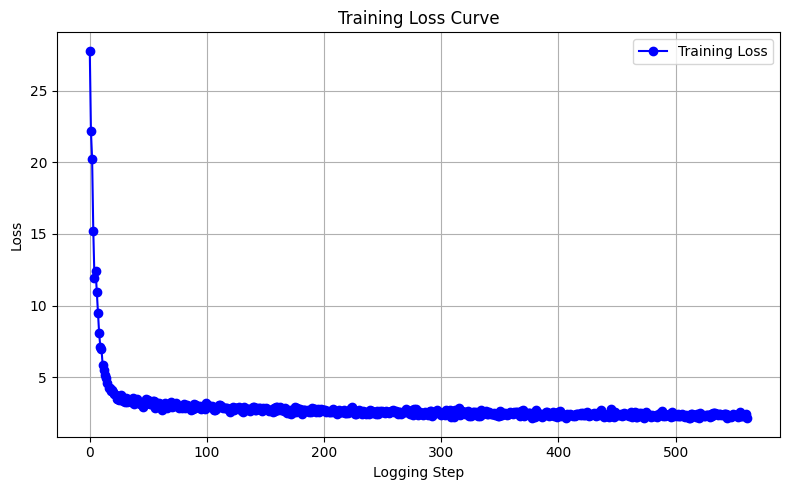

In [25]:
train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
steps = [i for i in range(len(train_loss))]

plt.figure(figsize=(8, 5))
plt.plot(steps, train_loss, label="Training Loss", color="blue", marker='o')
plt.xlabel("Logging Step")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
output_dir = "./mt5_finetuned_xlsum_model"

In [27]:
trainer.model.save_pretrained("mt5_xlsum_multilang_model")
tokenizer.save_pretrained("mt5_xlsum_multilang_model")

('mt5_xlsum_multilang_model/tokenizer_config.json',
 'mt5_xlsum_multilang_model/special_tokens_map.json',
 'mt5_xlsum_multilang_model/spiece.model',
 'mt5_xlsum_multilang_model/added_tokens.json')

In [28]:
model_finetuned = MT5ForConditionalGeneration.from_pretrained("mt5_xlsum_multilang_model")
model_finetuned.to(device)
model_finetuned.eval()

MT5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
          

In [29]:
preds_finetuned, tuned_scores = generate_summaries(eval_dataset, model_finetuned, tokenizer, num_samples=100)
print("\nFine-tuned ROUGE scores:")
for k, v in tuned_scores.items():
    print(f"{k}: {v:.4f}")


Fine-tuned ROUGE scores:
rouge1: 0.1342
rouge2: 0.0276
rougeL: 0.1058
rougeLsum: 0.1059


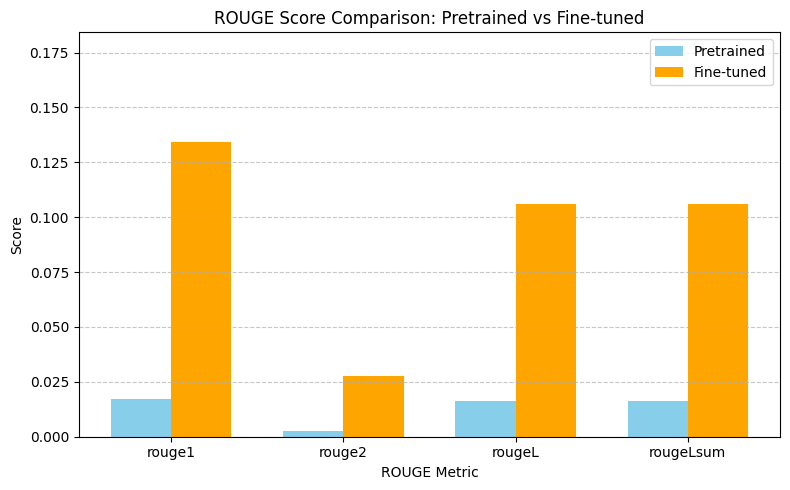

In [45]:
import matplotlib.pyplot as plt
import numpy as np

baseline_scores = {
    'rouge1': 0.0173,
    'rouge2': 0.0024,
    'rougeL': 0.0161,
    'rougeLsum': 0.0162
}

finetuned_scores = {
    'rouge1': 0.1342,
    'rouge2': 0.0276,
    'rougeL': 0.1058,
    'rougeLsum': 0.1059
}

metrics = list(baseline_scores.keys())
baseline_vals = list(baseline_scores.values())
finetuned_vals = list(finetuned_scores.values())

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, baseline_vals, width, label='Pretrained', color='skyblue')
plt.bar(x + width/2, finetuned_vals, width, label='Fine-tuned', color='orange')

plt.xlabel('ROUGE Metric')
plt.ylabel('Score')
plt.title('ROUGE Score Comparison: Pretrained vs Fine-tuned')
plt.xticks(x, metrics)
plt.ylim(0, max(finetuned_vals) + 0.05)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [31]:
def summarize_text(text, model, tokenizer, ratio=0.3, max_input_length=512):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=max_input_length,
        padding="max_length"
    ).to(model.device)

    input_length = torch.sum(inputs["attention_mask"]).item()
    dynamic_max_length = min(
        int(input_length * ratio * 1.5),  
        256  
    )
    
    generation_config = {
        "max_new_tokens": dynamic_max_length,
        "min_new_tokens": int(dynamic_max_length * 0.7),
        "length_penalty": 0.8 if ratio > 0.5 else 1.2,
        "no_repeat_ngram_size": 3,
        "early_stopping": False  
    }

    if ratio > 0.5:
        generation_config.update({
            "do_sample": True,
            "temperature": 0.7 + (ratio-0.5)*0.5,
            "top_k": 40,
            "top_p": 0.9
        })
    else:
        generation_config.update({
            "num_beams": 4,
            "temperature": 0.3  
        })

    summary_ids = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        **generation_config
    )

    decoded = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    last_punct = max(decoded.rfind("."), decoded.rfind("?"), decoded.rfind("!"))
    if last_punct != -1:
        decoded = decoded[:last_punct+1]
    
    return decoded

In [32]:
sample_data = eval_dataset[0] 
sample_text = sample_data['text'] 
reference_summary = sample_data['summary']

ratios = [0.3,0.7]

print("Original Input:\n", sample_text)
print("\nReference Summary:\n", reference_summary)

for ratio in ratios:
    generated_summary = summarize_text(sample_text, model_finetuned, tokenizer, ratio=ratio)
    print(f"\nGenerated Summary at ratio {ratio}:\n", generated_summary)


Original Input:
 The ten-member list of witnesses include Former Army Commander Sarath Fonseka, Deputy leader of the United National Party, Karu Jayasuriya, opposition MP Mangala Samaraweera, DNA MP Anura Kumara Dissanayake, prominent academic Professor Ashley Halpe and Sunday Leader Journalist Raisha Wickramatunge. The defence lawyers also informed the courts a request for Hot water for Sarath Fonseka,that was granted by the courts was not honoured by the prison officials. large scale corruption Later, speaking to the media, Sarath Fonseka accused the government of exploiting development projects of the past. “They are putting up signs with their name on other people’s work” he said. He also accused the government of large scale corruption.

Reference Summary:
 A new list of defence witnesses including prominent opposition politicians was submitted to the courts on Wednesday when the white flag case was taken before Trial-at-bar in Colombo.


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



Generated Summary at ratio 0.3:
 Prison officials have accused the government of corruption and corruption in the past five years, according to a court hearing. The prison lawyers have said they are being accused of the government's large scale corruption, including a former army commander.


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:695: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `0.8` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(



Generated Summary at ratio 0.7:
 The UK's prison officials have accused of the government of corruption. But what is it known as the government's long-serving corruption? It is the issue of a decision that the prison has been granted by the courts, the BBC's Matta Wives, and the BBC’s Jeremy Corbyn. But they are accused and their prisoners accused being investigating a court decision to reach out to courts. They have announced the petition for a petition. The BBC' has confirmed. In the court on Wednesday.


In [43]:
sample_data = eval_dataset[10] 
sample_text = sample_data['text'] 
reference_summary = sample_data['summary']

ratios = [0.3,0.7]

print("Original Input:\n", sample_text)
print("\nReference Summary:\n", reference_summary)

for ratio in ratios:
    generated_summary = summarize_text(sample_text, model_finetuned, tokenizer, ratio=ratio)
    print(f"\nGenerated Summary at ratio {ratio}:\n", generated_summary)


Original Input:
 इस बार ऐसा बिल्कुल नहीं हुआ. यह एक बड़ा फर्क है. इससे सरकार के कामकाज की शैली का अंदाज लगता है. विपक्षी दल अगर यह सवाल उठा रहे हैं कि गुजरात चुनाव के मद्देनजर सरकार जानबूझकर संसद के शीतकालीन सत्र को टाल रही है तो इसे निराधार नहीं कहा जायेगा. गुजरात चुनाव के अलावा संसद सत्र को टालने का कोई और कारण नहीं. जीएसटी की फाँस गड़ी, फिर भी 'मोदी जी अच्छे हैं'! मोदी-शाह की जोड़ी के सामने कहां है विपक्ष? शीतकालीन सत्र कब? अपवाद को छोड़, आम परिपाटी को देखें तो नवंबर के तीसरे सप्ताह तक संसद के शीतकालीन सत्र का न केवल एलान अपितु सत्रारंभ भी हो जाता रहा है. लेकिन इस बार अभी तक शीतकालीन सत्र की तारीख का भी एलान नहीं हुआ है. यह निश्चय ही असामान्य परिघटना और प्रक्रिया है. यह इस बात का संकेत भी है कि हमारे तंत्र में संसद का जनता से 'कनेक्ट' कैसे लगातार कम होता गया है. संसद जैसी प्रतिनिधि संस्था के स्थान पर व्यक्ति और दल महत्वपूर्ण होते जा रहे हैं. सत्ताधारी दल के सूत्र बता रहे हैं कि संसद का शीतकालीन सत्र इस बार दिसंबर के दूसरे या तीसरे सप्ताह से शुरू होगा. पार्टी के शीर्ष रणनीतिकार चाहते

In [44]:
import shutil
shutil.make_archive('mt5_xlsum_multilang', 'zip', 'mt5_xlsum_multilang')
shutil.make_archive('mt5_xlsum_multilang_model', 'zip', 'mt5_xlsum_multilang_model')

'/kaggle/working/mt5_xlsum_multilang_model.zip'